<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/HistogramEqualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Histogram Equalization
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Method 1 -Function to count number of pixels for each intensity value
def histoNew(imgOri):
  r=np.arange(0,256, dtype=int)
  count=np.zeros(len(r), dtype=int)
  for k in r:
    count[k]=(imgOri==k).sum()
  return (r,count)

In [ ]:
img1= cv2.imread('/content/image1.tif', 0) # Read the image1
img2= cv2.imread('/content/image2.tif', 0) # Read the image2
img3= cv2.imread('/content/image3.tif', 0) # Read the image3
img4= cv2.imread('/content/image4.tif', 0) # Read the image4

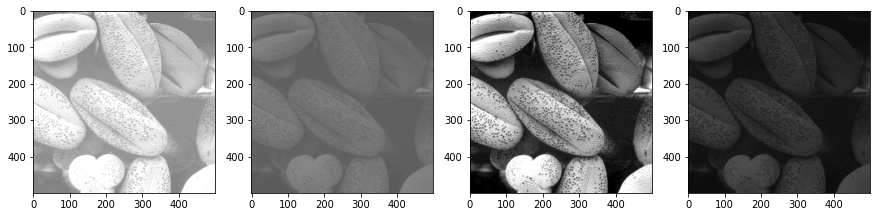

In [ ]:
images=np.array([img1,img2,img3,img4]) #Put all the images in one array
plt.figure(figsize= (15,5))

#Plot all the images
for i in range(len(images)):
  plt.subplot(1,len(images+1),i+1)
  plt.imshow(images[i], cmap="gray", vmin=0, vmax=255)

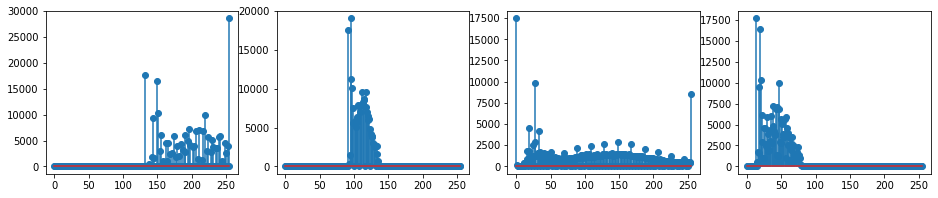

In [ ]:
#Call histogram function for all the images and plot the histogram
plt.figure(figsize= (20,3))
for i in range(len(images)):
  intensity,frequency= histoNew(images[i])
  plt.subplot(1,len(images)+1,i+1)
  plt.stem(intensity,frequency)


In [ ]:
#Method 2 -Counting the number of pixels for each intensity value
def hist_plot(img):
  m,n= img.shape
  nk= []
  rk=[]
  for r in range(256):
    count= 0
    rk.append(r)
    for i in range(m):
      for j in range(n):
        
        if img[i,j]==r:
          count+=1
    nk.append(count)
  return (rk,nk)

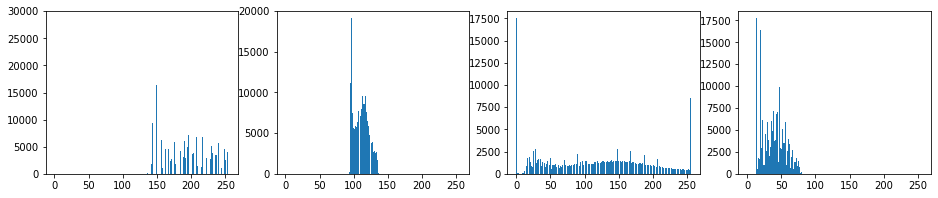

In [ ]:
#Plot image histogram by using built in function hist
plt.figure(figsize= (20,3))
for i in range(len(images)):
  plt.subplot(1,len(images)+1,i+1)
  plt.hist(images[i].ravel(),256, [0,256])

Histogram equalization

In [2]:
#Method 1 -Function to count number of pixels for each intensity value
def histoNew(imgOri):
  r=np.arange(0,256, dtype=int)
  count=np.zeros(len(r), dtype=int)
  for k in r:
    count[k]=(imgOri==k).sum()
  return (r,count)

In [3]:
img1= cv2.imread('/content/image2.tif', 0) # Read the image1

In [4]:
r,nk= histoNew(img1) #Obtain the frequency of each intensity in the given image using the function HistoNew
m,n=img1.shape #Obtain the number of roqs and columns in img1

In [ ]:
print(m,n)

500 500


In [5]:
df=pd.DataFrame({"intensity":r,"frequency":nk}) #create a dataframe with intensity and its corresponding frequency

In [6]:

#nk= np.array(nk) #Convert nk list to np array

pdf= nk/(m*n) # Find probability of each pixel
pdf1= pdf.copy()
cdf= np.array(np.zeros(len(pdf)))
cdf[0]= pdf[0]
#Obtain CDF
for i in range(1,len(pdf)):
  cdf[i]= cdf[i-1]+pdf1[i]
  
sk= cdf*255
sk= sk.astype(int) #Rounding sk



In [7]:
#Assign columns pdf, cdf and sk to the dataframe
df['pdf']=pdf1
df['cdf']=cdf
df['sk']=sk

In [8]:
#visualize the dataframe
df.tail(10)

,intensity,frequency,pdf,cdf,sk
246,246,0,0.0,1.0,255
247,247,0,0.0,1.0,255
248,248,0,0.0,1.0,255
249,249,0,0.0,1.0,255
250,250,0,0.0,1.0,255
251,251,0,0.0,1.0,255
252,252,0,0.0,1.0,255
253,253,0,0.0,1.0,255
254,254,0,0.0,1.0,255
255,255,0,0.0,1.0,255


In [9]:
imgEqu= np.zeros((m,n),dtype=int) #Create a matrix for equalized image
#Replace the pixel value in the original image by the pixel value sk obtained after equalization
for i in range(m):
  for j in range(n):
    temp= img1[i,j]
    imgEqu[i,j]= sk[temp]

imgEqu=imgEqu.astype('int')


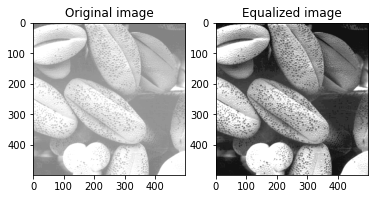

In [ ]:
#Plot original and equalized image
plt.subplot(1,2,1)
plt.title("Original image")
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title("Equalized image")
plt.imshow(imgEqu, cmap='gray', vmin=0, vmax=255)

Text(0, 0.5, 'intensity in the new image')

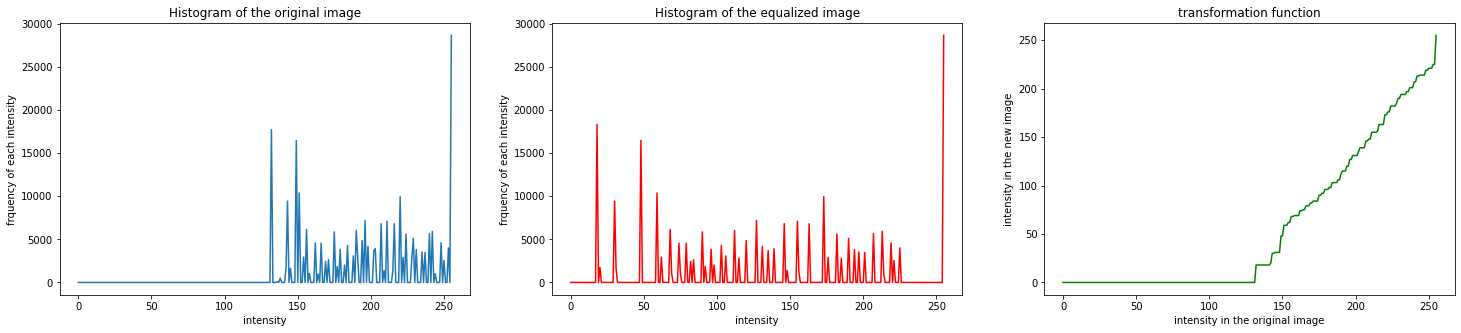

In [ ]:
plt.figure(figsize= (25,5))
plt.subplot(1,3,1)
plt.title("Histogram of the original image")
plt.xlabel("intensity")
plt.ylabel("frquency of each intensity")
r,nk= histoNew(img1)
plt.plot(r,nk)
plt.subplot(1,3,2)
plt.title("Histogram of the equalized image")
s,nq= histoNew(imgEqu)
plt.plot(s,nq, "-r")
plt.xlabel("intensity")
plt.ylabel("frquency of each intensity")
plt.subplot(1,3,3)
plt.title("transformation function")
plt.plot(r,sk, "-g")
plt.xlabel("intensity in the original image")
plt.ylabel("intensity in the new image")